## <span style="color:#000080"> **Análise Exploratória e Qualidade dos Dados**

### <span style="color:#4169E1"><b>1.1 Definição de pronto:</span> Dados analisados e insights documentados

### <span style="color:#4169E1"><b>1.2 Definição de entregue:</span> Notebook executando sem erros
### .....................................................................................................................

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import snappy

import seaborn as sns
import sklearn.preprocessing as sklpp
import geopandas as gp

pd.set_option("display.precision", 4)

import warnings
warnings.filterwarnings("ignore")

### ***A) Importar Dados de Chuvas, Pressao, Precipitação e Temperatura***

In [12]:
# Carga do arquivo csv preparada para a análise exploratória de dados. Ajustes de separador, primeira coluna como índice e parse de Data.
source_file = '../../Data/process/resultDados_patio1_completo.csv'

df_patio = pd.read_csv(source_file, delimiter=';', index_col=0, parse_dates=['Data'])

#### <span style="color:gray">A1. Posição do Vento.

In [13]:
def define_RosaVentos(num):
    if num > 0 and num < 22.5:
        return 'N'
    elif num >= 22.4 and num < 45:
        return 'NE'
    elif num > 44 and num < 67.5:
        return 'NE'
    elif num > 67.4 and num < 90:
        return 'E'
    elif num > 89 and num < 112.5:
        return 'E'
    elif num > 112.4 and num < 135:
        return 'SE'
    elif num > 134 and num < 157.5:
        return 'SE'
    elif num > 157.4 and num < 180:
        return 'S'
    elif num > 179 and num < 202.5:
        return 'S'
    elif num > 202.4 and num < 225:
        return 'SW'
    elif num > 224 and num < 247.5:
        return 'SW'
    elif num > 247.4 and num < 270:
        return 'W'
    elif num > 269 and num < 292.5:
        return 'W'
    elif num > 292.4 and num < 315:
        return 'NW'
    elif num > 314 and num < 337.5:
        return 'NW'
    elif num > 337.4 and num < 361:
        return 'N'
    return 'X'


df_patio['PosicaoVento'] = df_patio['Direcao'].map(define_RosaVentos)

In [14]:
# Exportar Dataframe para Uso no SerieTemporais
save_file = '../../Data/process/patio1_teste.csv'
df_patio.to_csv(save_file, index = True)

### <span style="color:#006400"> **B) Análise sobre os Dados**

#### <span style="color:#228B22">B1. Verificação de formato dos dados. 5 registros.

In [5]:
df_patio.head(5)

,Longitude,Latitude,Magnitude_Observada,Direcao,Data,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif,PosicaoVento
0,-42.75,-14.25,6.82,97.36,2017-01-01 00:00:00,1013.14,25.93,0.0,9.82,E
1,-42.75,-14.25,6.91,94.65,2017-01-01 01:00:00,1013.34,25.73,0.0,8.74,E
2,-42.75,-14.25,7.27,92.98,2017-01-01 02:00:00,1013.04,25.50,0.0,8.45,E
3,-42.75,-14.25,7.83,93.62,2017-01-01 03:00:00,1012.92,23.67,0.0,9.18,E
4,-42.75,-14.25,7.81,96.33,2017-01-01 04:00:00,1013.07,22.97,0.0,9.19,E


#### <span style="color:#228B22"> B2. Verificação de nulidade e tipos de dados. 

In [6]:
df_patio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Longitude            8760 non-null   float64       
 1   Latitude             8760 non-null   float64       
 2   Magnitude_Observada  8760 non-null   float64       
 3   Direcao              8760 non-null   float64       
 4   Data                 8760 non-null   datetime64[ns]
 5   Valor_Pressao        8760 non-null   float64       
 6   Valor_Temp           8760 non-null   float64       
 7   Valor_Chuva          8760 non-null   float64       
 8   Magnitude_Verif      8760 non-null   float64       
 9   PosicaoVento         8760 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 752.8+ KB


#### <span style="color:#228B22">**B3. Estatísticas Gerais**

- A mínima e a máxima são os valores nos “extremos” de um conjunto de dados ordenados: ou seja, o menor e o maior valor. Ambos são utilizados cotidianamente e facilmente compreensíveis
- A média consiste na soma dos valores dividido pelo número de observações. 
- A mediana, o valor que está no meio deste conjunto de dados ordenados.
<br><br>
Enquanto a média leva em consideração todos os valores e é afetada pelos outliers, a mediana ordena os valores de forma crescente e busca por aquele que está no meio.

#### <span style="color:#006400">**B3.1 Variaveis Contínuas**

In [7]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,Magnitude_Observada,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
count,8760.00,8760.00,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000
mean,-42.75,-14.25,5.7703,106.3479,1015.0073,24.9033,0.0426,7.9984
std,0.00,0.00,2.1793,45.6072,3.7491,4.4547,0.2733,2.7865
min,-42.75,-14.25,0.0200,0.7100,1005.1900,14.1300,0.0000,0.7800
25%,-42.75,-14.25,4.2900,90.8075,1012.2400,21.6100,0.0000,6.0800
50%,-42.75,-14.25,6.1300,96.7950,1014.6000,24.6000,0.0000,8.1500
75%,-42.75,-14.25,7.4400,105.6100,1017.6100,27.8500,0.0000,9.8800
max,-42.75,-14.25,11.8800,358.1200,1026.8000,36.2700,6.7500,16.9400


##### <span style="color:#006400">**B3.2 Variaveis Categóricas**

In [8]:
df_patio.describe(exclude=[np.number])

,Data,PosicaoVento
count,8760,8760
unique,8760,9
top,2017-02-22 04:00:00,E
freq,1,7181
first,2017-01-01 00:00:00,NaN
last,2017-12-31 23:00:00,NaN


#### <span style="color:#228B22">B4. Variação Dinâmica das Variáveis Contínuas

In [9]:
for (column, _ ) in df_patio.filter(items=['Valor_Pressao','Valor_Temp','Valor_Chuva','Magnitude_Verif','Magnitude_Observada']).items():
    print(f'{column} \t faixa dinâmica: {"{:.2f}".format(df_patio[column].max() - df_patio[column].min())}')

Valor_Pressao 	 faixa dinâmica: 21.61
Valor_Temp 	 faixa dinâmica: 22.14
Valor_Chuva 	 faixa dinâmica: 6.75
Magnitude_Verif 	 faixa dinâmica: 16.16
Magnitude_Observada 	 faixa dinâmica: 11.86


### <span style="color:#006400"> **C) Visualização Gráfica - Mapa**

#### <span style="color:#228B22">C1. Criando informação de ponto geométrico 

In [10]:
df_patio_coord = pd.read_csv('../../Data/raw/eolica/00_cadastro_patio.txt', delimiter=';', index_col=0)
df_patiog = gp.GeoDataFrame(df_patio_coord, geometry=gp.points_from_xy(df_patio_coord.Longitude, df_patio_coord.Latitude))

# df_patiog = gp.GeoDataFrame(df_patio, geometry=gp.points_from_xy(df_patio.Longitude, df_patio.Latitude))
# df_patiog.head(5)

#### <span style="color:#228B22">C2. Plotando o ponto no mapa >>> Achar shape dos estados do Brasil onde os pontos serão mostrados <<<

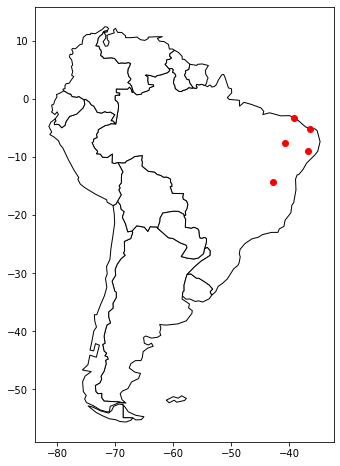

In [11]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# Restrito para América do Sul
ax = world[world.continent == 'South America'].plot(color='white', edgecolor='black',figsize=(10, 8))

# Plotando o gráfico.
df_patiog.plot(ax=ax, color='red')

plt.show()

### <span style="color:#006400"> **D) Visualização Gráfica - Histograma**

#### <span style="color:#228B22"> **D1. Histogramas com as distribuições das variáveis**

<b>Histograma</b> é um gráfico que mostra a distribuição de acontecimentos registrados em todo o espectro. Graficamente é um conjunto de retângulos 
que têm as bases sobre o eixo x e a área proporcional às frequências de classe. Fatores a serem analisados:
<p>
<b>1. Amplitude:</b><br>
- Quantas amostras representam determinado comportamento? <br>
- A distribuição é mais homogênea entre as classes, ou as amostras se concentram em determinada região? <br>
<b>2.Mediana:</b><br>
- Qual é o ponto central onde, estatisticamente, existe o maior registro de ocorrências?<br>
<b>3.Dispersão:</b><br>
- Qual é o grau de variedade de classes que existem no meu sistema?<br>
- Existem amostras distribuídas entre muitos grupos no meu gráfico?

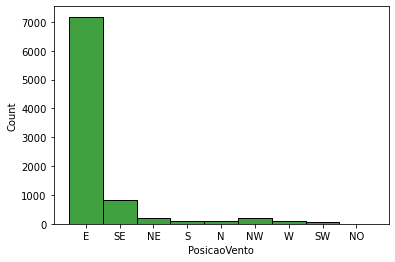

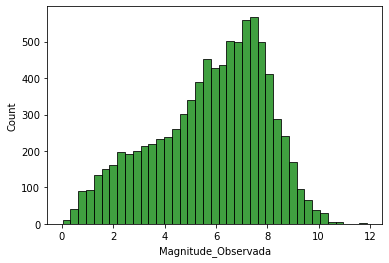

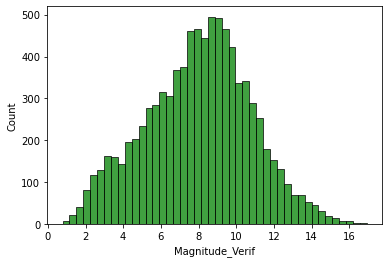

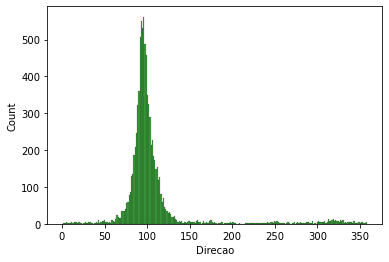

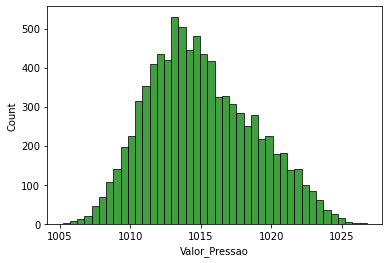

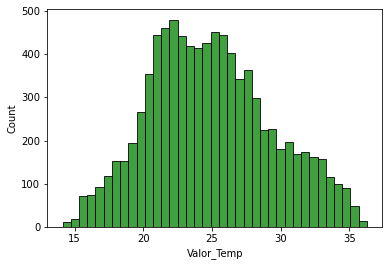

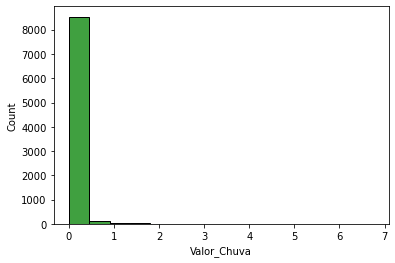

<Figure size 432x288 with 0 Axes>

In [12]:
for (column, _ ) in df_patio.filter(items=['PosicaoVento','Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    sns.histplot(df_patio[column], color='green')
    plt.figure()

---------------------------------------------------------
###### Outro Código
---------------------------------------------------------
<i>for (column, _ ) in df_patio.filter(items=<br>['Longitude','Latitude','Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()<br>
    df_patio[column].plot.hist(bins=50, figsize=(10,5), legend=True,color='#8FBC8F');<br>
    plt.legend(ncol = 1)<br>
    plt.title(column)</i>

#### <span style="color:#228B22">**D2. Utilizando KDE - Kernel Density Estimate**

https://www.youtube.com/watch?v=DCgPRaIDYXA<br>
O gráfico KDE descrito como estimativa de densidade do kernel é usado para visualizar a densidade de probabilidade de uma variável contínua.
<p>
Um histograma é basicamente um gráfico de barras para variáveis quantitativas, que são divididas em intervalos, e nos mostra a frequência de dados que se tem em cada intervalo; o KDE é uma estimativa da densidade desses dados, calculando a probabilidade de se ter um ponto naquele local do gráfico.

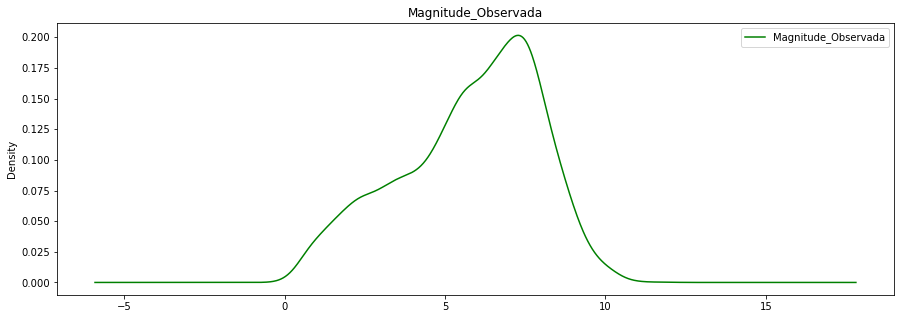

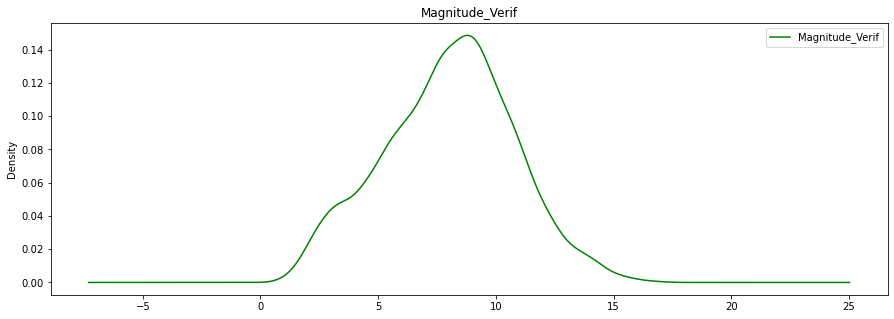

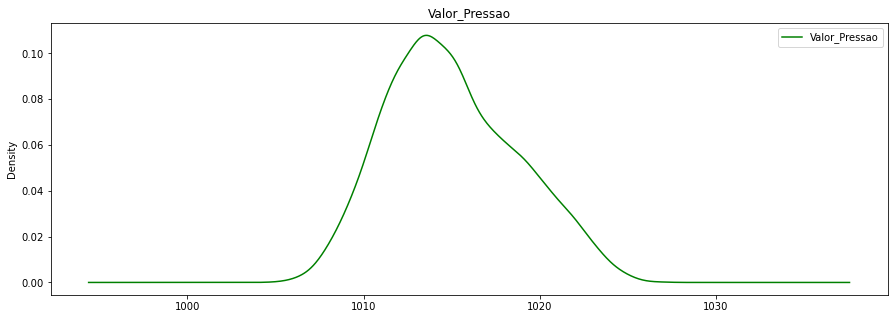

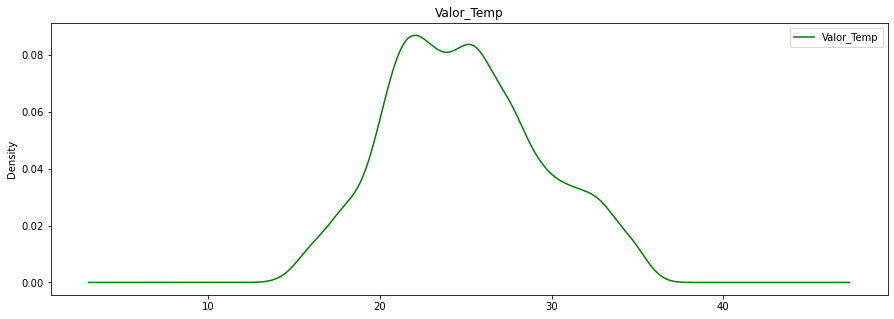

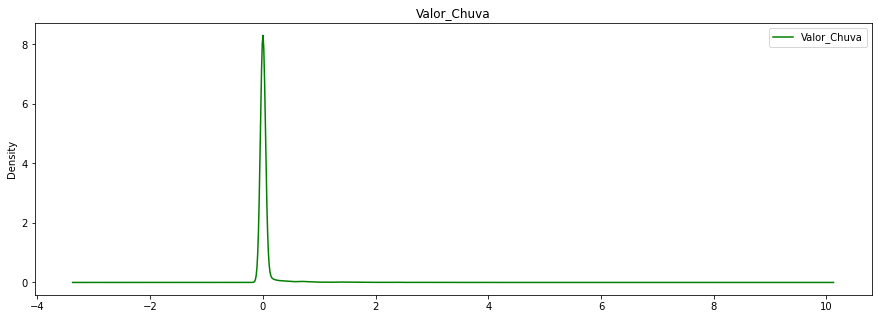

In [13]:
for (column, _ ) in df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()
    df_patio[column].plot.kde(figsize=(15,5), legend=True,color='#008000');
    plt.legend(ncol = 1)
    plt.title(column)

### <span style="color:#006400"> **E) Coeficientes de correlação**

#### <span style="color:#228B22">**E.1. Visão Tabular**

In [14]:
df_patio_normalizado = df_patio.drop(['Longitude', 'Latitude','Data','PosicaoVento'], axis=1)
df_patio_normalizado.corr()

,Magnitude_Observada,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
Magnitude_Observada,1.0000,-0.2498,0.5722,-0.5180,-0.1500,0.6807
Direcao,-0.2498,1.0000,-0.1582,0.0960,0.1312,-0.1713
Valor_Pressao,0.5722,-0.1582,1.0000,-0.5698,-0.1352,0.4512
Valor_Temp,-0.5180,0.0960,-0.5698,1.0000,-0.0290,-0.2718
Valor_Chuva,-0.1500,0.1312,-0.1352,-0.0290,1.0000,-0.1181
Magnitude_Verif,0.6807,-0.1713,0.4512,-0.2718,-0.1181,1.0000


#### <span style="color:#228B22">**E.2. Mapa de Calor**

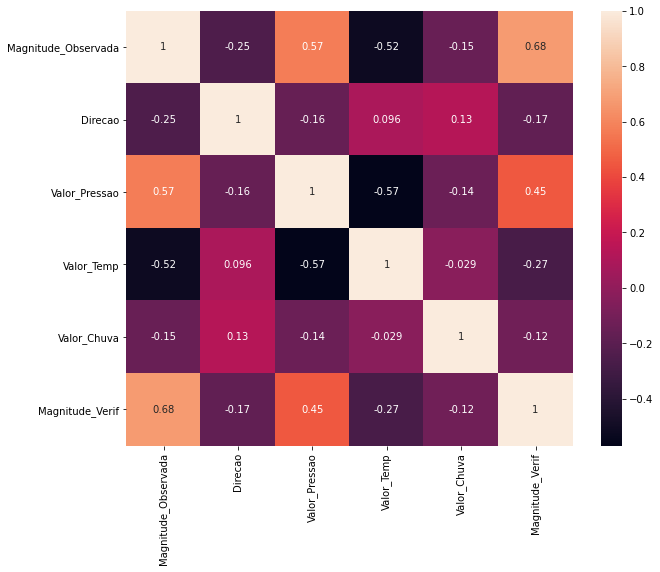

In [15]:
ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_patio_normalizado.corr(),annot=True)

### <span style="color:#006400"> **F) Visualização Gráfica - Scatterplot**

PairPlot é um gráfico que mostra as relações entre todas as variáveis do conjunto de dados. <p>
    
- Parametro kind = reg (Regressão Linear). Esse plot desenha o scatterplot, cria a linha de regressão — na prática é um algoritmo de Machine Learning, delimita as margens de erro, aplicamos os histogramas nos eixos para verificar a distribuição das variáveis e ainda desenhamos a linha com o gráfico de densidade.

#### <span style="color:#228B22">F.1. Com kde e regressão linear nas correlações

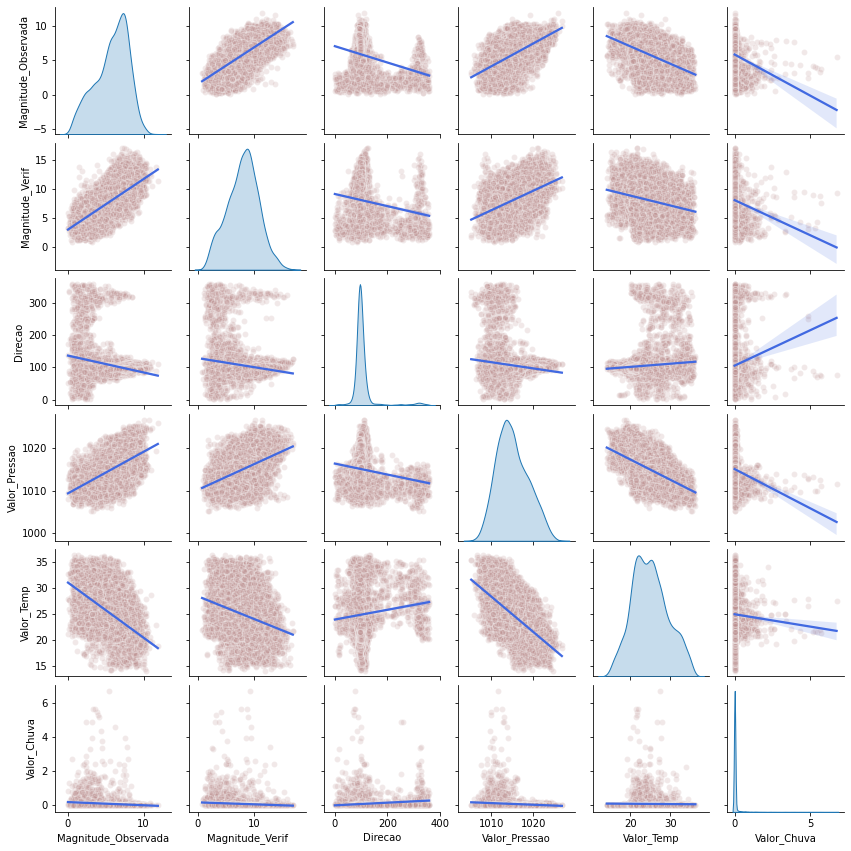

In [16]:
sns.pairplot(df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']), 
             diag_kind="kde", kind="reg", height=2.0
            ,plot_kws={'line_kws':{'color':'#4169E1'}, 
                           'scatter_kws': {'alpha': 0.2, 'color': '#BC8F8F','edgecolor': 'w'}})

### <span style="color:#006400"> **G) Visualização Gráfica - Box Plot (Diagrama de Caixa)**

Na estatística, o Boxplot, ou diagrama de caixa, é uma maneira gráfica de representar a alteração dos dados de uma variável por meio de quartis. É um método alternativo ao histograma e ao "ramo-e-folha" para representar os dados.
<p>
O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.
<p>
Em um boxplot são apresentadas 5 estatísticas: o mínimo, o primeiro quartil (Q1), a mediana, o terceiro quartil (Q3) e o máximo. Esses valores também são chamados de resumo dos cinco números. Para construir um desenha-se um retângulo alinhado verticalmente (ou horizontalmente) com duas semirretas, uma em cada um dos lados opostos do retângulo.

A altura do retângulo é definida pelos quartis Q1 e Q3. Uma linha secciona o retângulo no valor da mediana (ou Q2). As semirretas ligam respectivamente os quartis Q1 e Q3 ao valor mínimo e ao máximo do conjunto de dados.

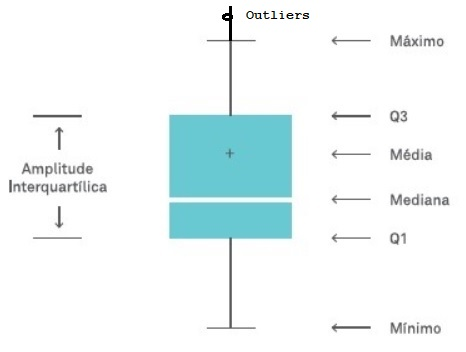

In [12]:
from IPython.display import Image
Image(filename='boxplot.jpg')

- O centro da distribuição é indicado pela linha da mediana, no centro do quadrado.
- A dispersão é representada pela amplitude do gráfico, que pode ser calculada como máximo valor – mínimo valor. Quanto maior for a amplitude, maior a variação nos dados.
- O retângulo contém 50% dos valores do conjunto de dados. A posição da linha mediana no retângulo informa sobre a assimetria da distribuição.
- Uma distribuição simétrica teria a mediana no centro do retângulo. Se a mediana é próxima de Q1, então, os dados são positivamente assimétricos.Se a mediana é próxima de Q3 os dados são negativamente assimétricos. 
- Os outliers em um box plot aparecem como pontos ou asteriscos fora das “linhas” desenhadas e indicam possíveis valores discrepantes.
- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição. Os outliers serão os valores fora de Limite Inferior = Q1-1.5*(Q3-Q1) e Limite Superior = Q3+1.5*(Q3 -Q1).


In [4]:
df_patio.describe(include=[np.number])

,Longitude,Latitude,Magnitude_Observada,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva,Magnitude_Verif
count,8760.00,8760.00,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000,8760.0000
mean,-42.75,-14.25,5.7703,106.3479,1015.0073,24.9033,0.0426,7.9984
std,0.00,0.00,2.1793,45.6072,3.7491,4.4547,0.2733,2.7865
min,-42.75,-14.25,0.0200,0.7100,1005.1900,14.1300,0.0000,0.7800
25%,-42.75,-14.25,4.2900,90.8075,1012.2400,21.6100,0.0000,6.0800
50%,-42.75,-14.25,6.1300,96.7950,1014.6000,24.6000,0.0000,8.1500
75%,-42.75,-14.25,7.4400,105.6100,1017.6100,27.8500,0.0000,9.8800
max,-42.75,-14.25,11.8800,358.1200,1026.8000,36.2700,6.7500,16.9400


<Figure size 432x288 with 0 Axes>

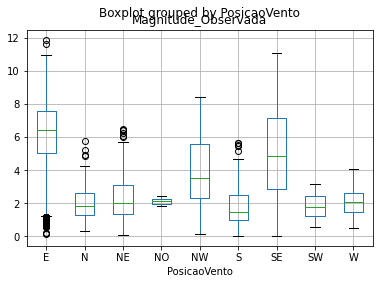

<Figure size 432x288 with 0 Axes>

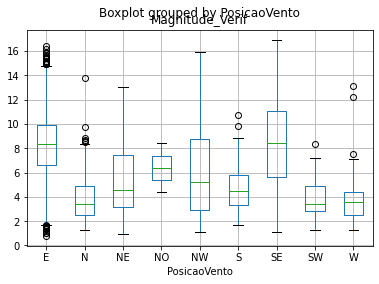

<Figure size 432x288 with 0 Axes>

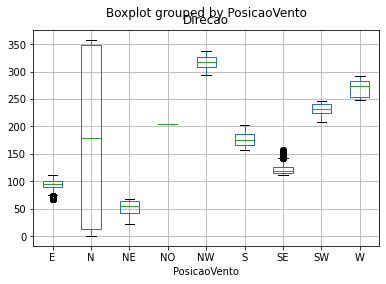

<Figure size 432x288 with 0 Axes>

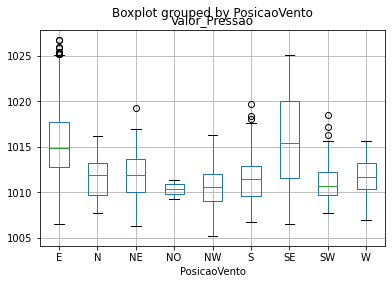

<Figure size 432x288 with 0 Axes>

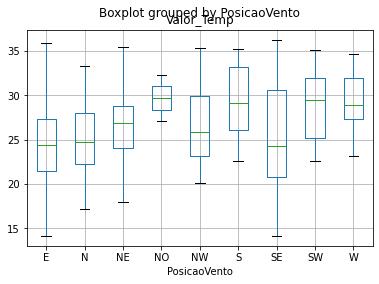

<Figure size 432x288 with 0 Axes>

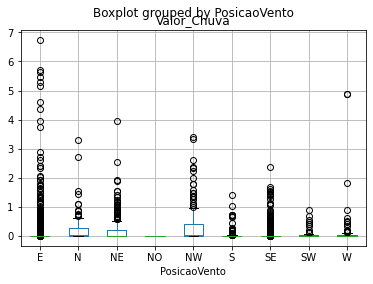

In [10]:
# Avaliar o grau de espalhamento de dados (dispersão) em torno da medida de centralidade
for (column, _ ) in df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva']).items():
    plt.figure()
    df_patio.boxplot(column = column ,by='PosicaoVento');
    #plt.title(column)

### <span style="color:#D2691E"> **H) Normalização dos dados por Mínimo e Máximo**

<b>Normalizar</b> é uma técnica que visa transformar todas as variáveis na mesma ordem de grandeza e tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.<p>
   <i>Formula: Xnorm = (X - Xmin) / (Xmax - Xmin)</i><p>
       
Observação:Se a distribuição não é Gaussiana ou o desvio padrão é muito pequeno, normalizar os dados é uma escolha a ser tomada.

#### <span style="color:#A0522D">H1. Usando MinMaxScaler para normalizar cada coluna

In [18]:
min_max_scaler = sklpp.MinMaxScaler()

df_patio_filtrado = df_patio.filter(items=['Magnitude_Observada','Magnitude_Verif','Direcao','Valor_Pressao','Valor_Temp','Valor_Chuva'])

df_patio_normalizado = min_max_scaler.fit_transform(df_patio_filtrado)
df_patio_normalizado = pd.DataFrame(df_patio_normalizado)

# scikit learn retira as colunas do dataframe modificado. Colocando-as de volta
df_patio_normalizado.columns = df_patio_filtrado.columns

# visualização da normalização
df_patio_normalizado.head()

,Magnitude_Observada,Magnitude_Verif,Direcao,Valor_Pressao,Valor_Temp,Valor_Chuva
0,0.5734,0.5594,0.2704,0.3679,0.5330,0.0
1,0.5809,0.4926,0.2628,0.3771,0.5239,0.0
2,0.6113,0.4746,0.2582,0.3633,0.5136,0.0
3,0.6585,0.5198,0.2600,0.3577,0.4309,0.0
4,0.6568,0.5204,0.2675,0.3646,0.3993,0.0


#### <span style="color:#A0522D">**H2.Grafico Paiplot com Valores Normalizados**

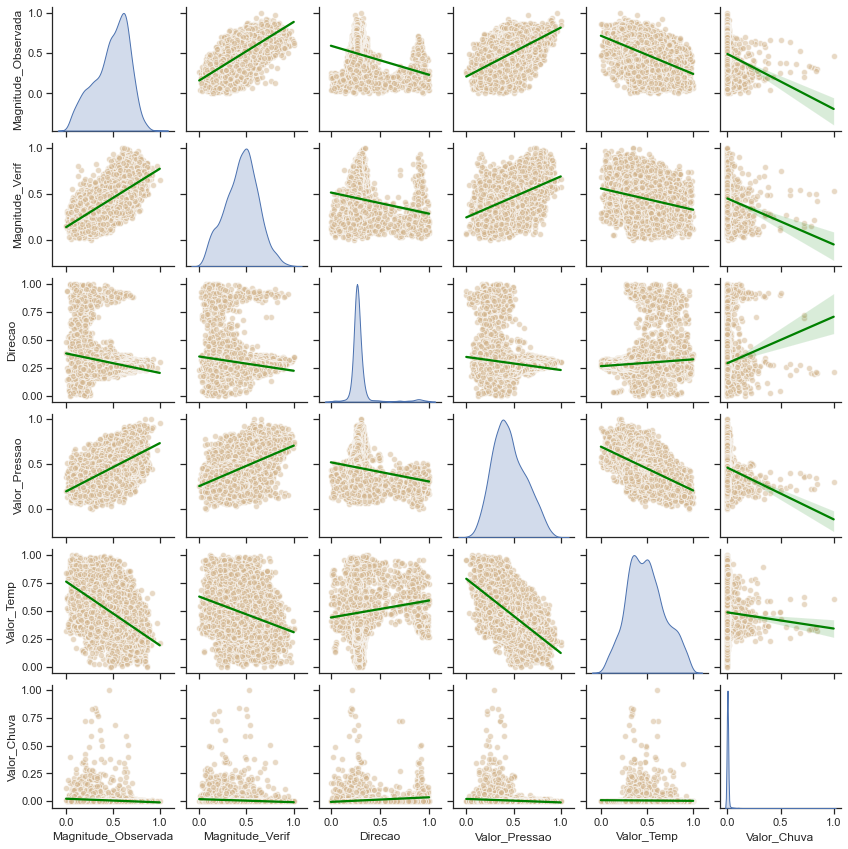

In [19]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_patio_normalizado, diag_kind="kde", kind="reg", height=2.0, plot_kws={'line_kws':{'color':'#008000'}, 
                           'scatter_kws': { 'color': '#D2B48C','edgecolor': 'w','alpha': 0.5}}) 

#### <span style="color:#A0522D">**H2.Grafico BoxPlot com Valores Normalizados**

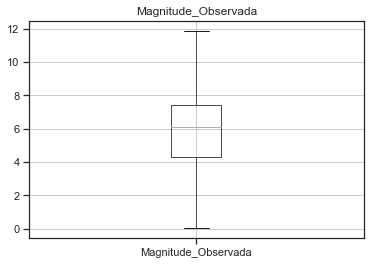

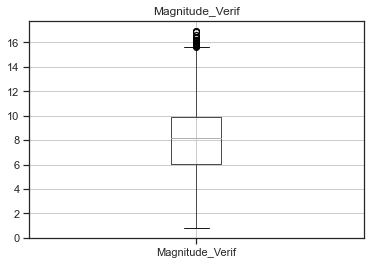

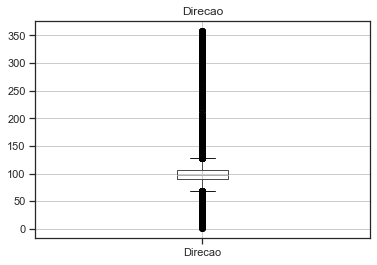

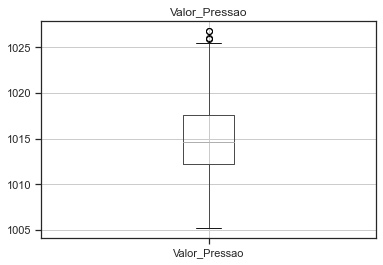

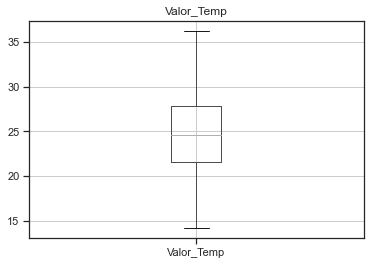

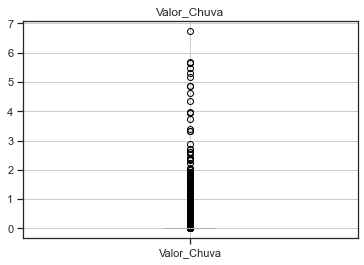

In [20]:
for (column, _ ) in df_patio_normalizado.items():
    plt.figure()
    df_patio.boxplot(column = column);
    plt.title(column)